# Lab 4 : Clustering on IOT-detection and NSL-KDD

Objective:
In this lab, we will learn how to apply two basic clustering algorithms—K-means and Hierarchical Clustering (CAH)—on two datasets: NSL-KDD (network intrusion detection) and IoT-detection (device activity detection). By the end of the lab, we should be able to run these algorithms and interpret the resulting clusters.


## Part 1: Introduction to Clustering
Clustering is a way of grouping similar data points together. For example, if you have data about network traffic, you might want to group the traffic into "normal" behavior and "suspicious" activity. Similarly, you could group IoT devices based on their activity patterns.
There are many clustering algorithms, but today, we'll focus on:
1.	K-means: This algorithm divides data into a specified number of clusters by finding groups that are similar.
2.	Hierarchical Clustering (CAH): This method builds clusters step-by-step by merging similar data points.


## Part 2: Loading the Data
Upload your pre-processed datasets (iot_detection.csv uploaded in /content)

In [3]:
import pandas as pd

# Load the dataset (NSL-KDD or IoT-detection)
data = pd.read_csv('iot_detection.csv')

## Part 3: K-means Clustering
Running K-means clustering with 3 clusters.
Visualizing the clusters using the first two features of the dataset.

**Step 1: Encode Categorical Data**
You can use pd.get_dummies to convert categorical columns into numerical format.

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Check the first few rows to ensure encoding was successful
print(data_encoded.head())

**Selecting Relevant Features**

For clustering, we typically want to select columns that best represent the characteristics of the data. Here, let's focus on a subset of numerical features for clustering.

In [5]:
# Selecting a subset of relevant numerical features for clustering
selected_features = ['IPLength', 'IPHeaderLength', 'TTL', 'SourcePort', 'DestPort', 'WindowSize']

# Create a new dataframe with only the selected features
data_selected = data[selected_features]

**Step 2: Normalize the Data**

Clustering algorithms like K-means are sensitive to the scale of the data, so it's essential to standardize the selected features.

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

**Step 3: Apply K-means Clustering**

Now, we can run the K-means clustering algorithm on the selected and standardized features.

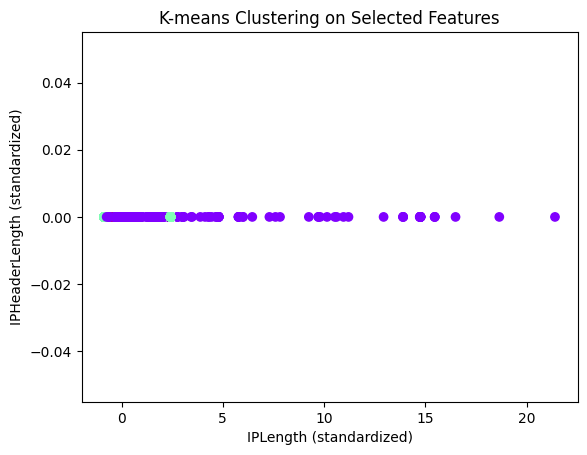

In [7]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# K-means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Plotting the clusters using the first two features
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-means Clustering on Selected Features')
plt.xlabel('IPLength (standardized)')
plt.ylabel('IPHeaderLength (standardized)')
plt.show()

Here’s how we can improve clustering with PCA and visualize the results using different features:

**Apply PCA for Dimensionality Reduction**

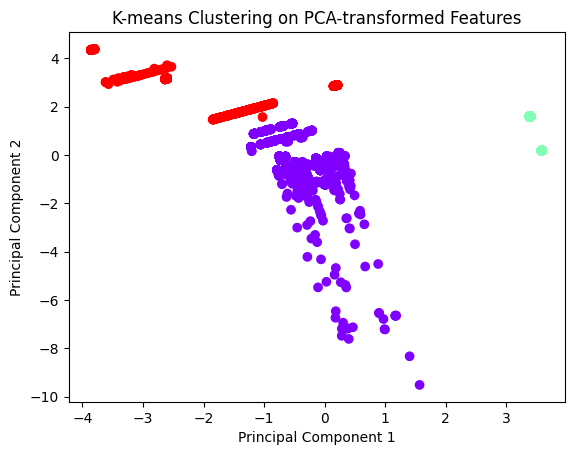

In [8]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# K-means Clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Plotting the clusters on the PCA-transformed data
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-means Clustering on PCA-transformed Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

* The points are now distributed more distinctly across the plot, with visible separation among the clusters. This indicates that applying PCA for dimensionality reduction has helped in visualizing the clustering pattern effectively.


* The clusters seem to capture some underlying structure in the data, which was not evident in the previous plots.

## Part 4: Hierarchical Clustering (CAH)


1.   Running Hierarchical Clustering using the Ward method.

2.   Visualizing the clustering process with a dendrogram.

**Step 1: Load the Data and Select Numerical Features**

Ensure that we only select columns that contain numerical values.

In [10]:
selected_features = ['IPLength', 'IPHeaderLength', 'TTL', 'SourcePort', 'DestPort', 'WindowSize']
data_selected = data[selected_features]

**Step 2: Standardize the Data**

Normalize the selected numerical features to ensure they are on the same scale.

In [11]:
# Standardize the selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

**Step 3: Apply Hierarchical Clustering (CAH)**

Now, we use the scaled data for hierarchical clustering.

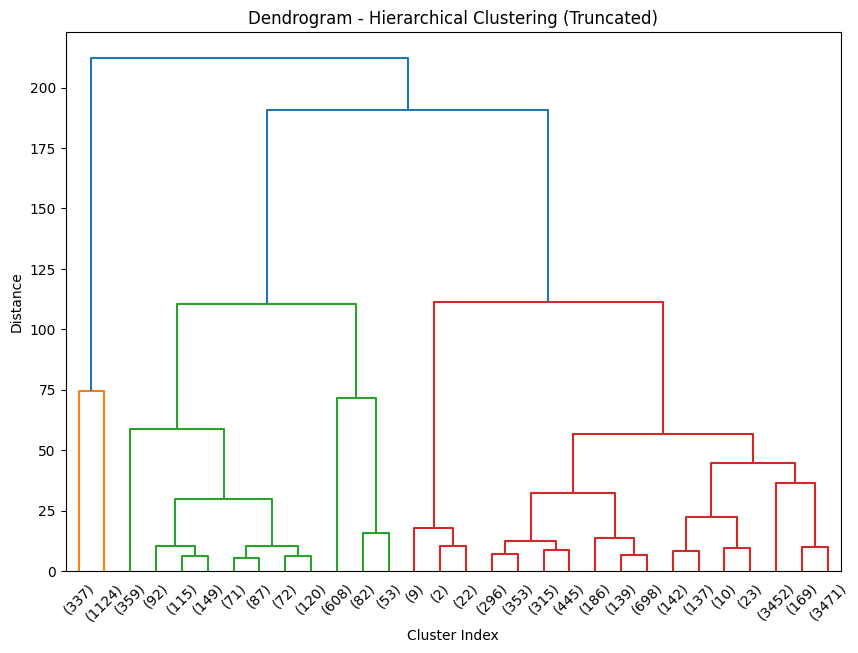

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create the linkage matrix using the Ward method
linked = linkage(data_scaled, method='ward')

# Plot the truncated dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30)  # Show only the last 30 merged clusters
plt.title('Dendrogram - Hierarchical Clustering (Truncated)')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

Part 5: Questions to Answer
After running the K-means and Hierarchical Clustering algorithms, we will address the following questions:

1. K-means Clustering:
How many clusters did K-means create?

K-means created 3 clusters, as we specified when we ran the algorithm (n_clusters=3).
Can we see any clear separation between clusters in the plot?

In the PCA-transformed plot, there is a clear separation between clusters. The points are grouped into distinct areas of the plot, indicating that K-means was able to identify some structure in the data. However, the separation may not always be perfect, as K-means tries to partition the data into spherical clusters, which may not always match the true structure of the data.
2. Hierarchical Clustering (CAH):
Look at the dendrogram. How many clusters do we think are present based on the dendrogram?

Based on the dendrogram, a good choice would be to cut at a distance of around 100, which would give us 3 clusters. The point where the vertical lines become much longer indicates the merging of distinct clusters, suggesting that three primary clusters are present in the data.
How does Hierarchical Clustering differ from K-means in grouping the data?

Hierarchical Clustering:
Builds a hierarchical tree (dendrogram) to represent the nested grouping of data points.
Does not require specifying the number of clusters beforehand. We can decide the number of clusters by choosing where to "cut" the dendrogram.
Can capture more complex relationships between data points because it does not assume spherical clusters, as K-means does.
K-means Clustering:
Requires us to specify the number of clusters in advance.
Divides the data into spherical clusters based on the distance to the cluster centroids.
More computationally efficient for large datasets but less flexible in terms of capturing different cluster shapes.
In summary, while K-means is more straightforward and assumes a pre-defined number of clusters, hierarchical clustering provides more flexibility in exploring the clustering structure without needing to specify the number of clusters initially.